# EDA ON SALES DATA

## About the Dataset
The dataset consists of 11 columns, each column representing an attribute of purchase on a product

**Order ID** - A unique ID for each order placed on a product

**Product** - Item that is purchased

**Quantity Ordered** - Describes how many of that products are ordered

**Price Each** - Price of a unit of that product

**Order Date** - Date on which the order is placed

**Purchase Address** - Address to where the order is shipped

**Month, Sales, City, Hour** - Extra attributes formed from the above.

## Acknowledgements
Dataset is downloaded and compiled from KeithGalli's GitHub repository on Pandas Data Science Tasks.
You find and access the repository [here](https://github.com/KeithGalli/Pandas-Data-Science-Tasks)

## Inspiration
A Dataset to practice basic EDA and Cleaning.


## Importing Libraries

In [36]:
import pandas as pd # type: ignore
import numpy as np  # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [37]:
sales_df = pd.read_csv('../data/Sales_Data.csv')

## Exploring Data

In [38]:
sales_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,30/12/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,29/12/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,22/12/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,18/12/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [39]:
# dropping unnecessary column
sales_df.drop(columns='Unnamed: 0' , inplace= True)

In [40]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,30/12/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,29/12/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,22/12/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,18/12/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [41]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


In [42]:
# checking data type of each column
sales_df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

**As we can see all the data types assigned are correct expect the column `Order Date`, the data type of `Order Date` should `datetime` but as we already extracted the information such as `month` and `time` so we don't need to change the data type but still you want you can run the cell below:**

In [43]:
## sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

## Checking overall summary of sales data

In [44]:
sales_df.describe()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


**Looking at the summary of sales data we can the maximum, mininum, and average price of the items that are sold and many other things**

## Checking null and duplicate values

In [45]:
## null values
sales_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

**0 null values so we are good to go**

In [46]:
## duplicate values
sales_df[sales_df.duplicated(subset=['Order ID','Product','City'] , keep=False )]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
437,296081,Flatscreen TV,1,300.00,30/12/2019 16:52,"970 Sunset St, Austin, TX 73301",12,300.00,Austin,16
438,296081,Flatscreen TV,1,300.00,30/12/2019 16:52,"970 Sunset St, Austin, TX 73301",12,300.00,Austin,16
1047,296668,AAA Batteries (4-pack),2,2.99,20/12/2019 16:07,"535 7th St, San Francisco, CA 94016",12,5.98,San Francisco,16
1048,296668,AAA Batteries (4-pack),4,2.99,20/12/2019 16:07,"535 7th St, San Francisco, CA 94016",12,11.96,San Francisco,16
1726,297311,Bose SoundSport Headphones,1,99.99,07/12/2019 7:30,"858 Willow St, Los Angeles, CA 90001",12,99.99,Los Angeles,7
...,...,...,...,...,...,...,...,...,...,...
183323,220392,Lightning Charging Cable,1,14.95,08/06/2019 17:13,"472 8th St, Portland, ME 04101",6,14.95,Portland,17
183825,220882,Lightning Charging Cable,1,14.95,13/06/2019 17:53,"588 Lake St, Boston, MA 02215",6,14.95,Boston,17
183826,220882,Lightning Charging Cable,1,14.95,13/06/2019 17:53,"588 Lake St, Boston, MA 02215",6,14.95,Boston,17
184690,221711,Bose SoundSport Headphones,1,99.99,15/06/2019 16:36,"139 West St, New York City, NY 10001",6,99.99,New York City,16


**As we can see there some duplicate record so keeping the `first record` and dropping other**

## Dropping Duplicates

In [47]:
sales_df.drop_duplicates(keep ='first' , inplace = True)

In [48]:
sales_df.duplicated().sum()

0

## Now our data is ready for EDA

In [49]:
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,30/12/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,29/12/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,22/12/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,18/12/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,07/06/2019 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,01/06/2019 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,22/06/2019 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,26/06/2019 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


### Unqiue product that are sold

In [50]:
sales_df['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

### Total sales done from each product

In [51]:
total_sales = sales_df.groupby('Product')['Price Each'].sum().reset_index()
total_sales

,Product,Price Each
0,20in Monitor,450739.02
1,27in 4K Gaming Monitor,2427687.75
2,27in FHD Monitor,1124625.02
3,34in Ultrawide Monitor,2346058.26
4,AA Batteries (4-pack),78942.72
5,AAA Batteries (4-pack),61629.88
6,Apple Airpods Headphones,2328750.00
7,Bose SoundSport Headphones,1329667.02
8,Flatscreen TV,1438200.00
9,Google Phone,3313200.00


<Figure size 1600x900 with 0 Axes>

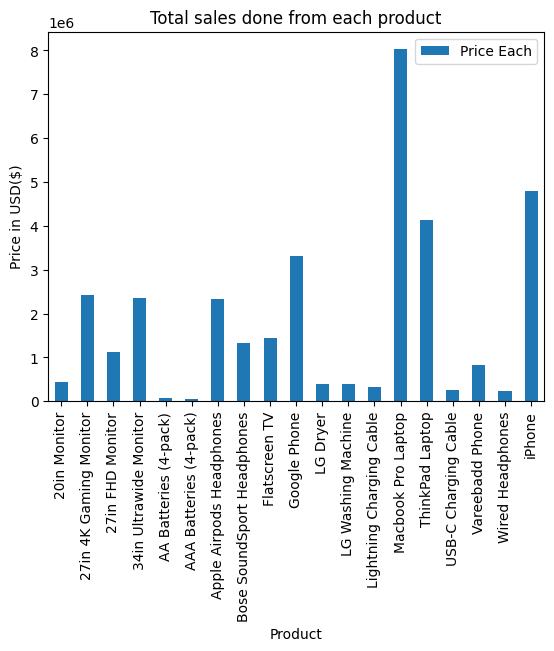

In [52]:
plt.figure(figsize=(16,9))
total_sales.plot(x = 'Product' , y = 'Price Each' , kind = 'bar')
plt.title('Total sales done from each product')
plt.ylabel('Price in USD($)')
plt.show()

### Top 10 selling product

In [53]:
top_10_products = sales_df.groupby('Product')['Price Each'].sum().reset_index().sort_values(by='Price Each' , ascending = False).head(10)
top_10_products

,Product,Price Each
13,Macbook Pro Laptop,8025700.00
18,iPhone,4788000.00
14,ThinkPad Laptop,4125958.74
9,Google Phone,3313200.00
1,27in 4K Gaming Monitor,2427687.75
3,34in Ultrawide Monitor,2346058.26
6,Apple Airpods Headphones,2328750.00
8,Flatscreen TV,1438200.00
7,Bose SoundSport Headphones,1329667.02
2,27in FHD Monitor,1124625.02


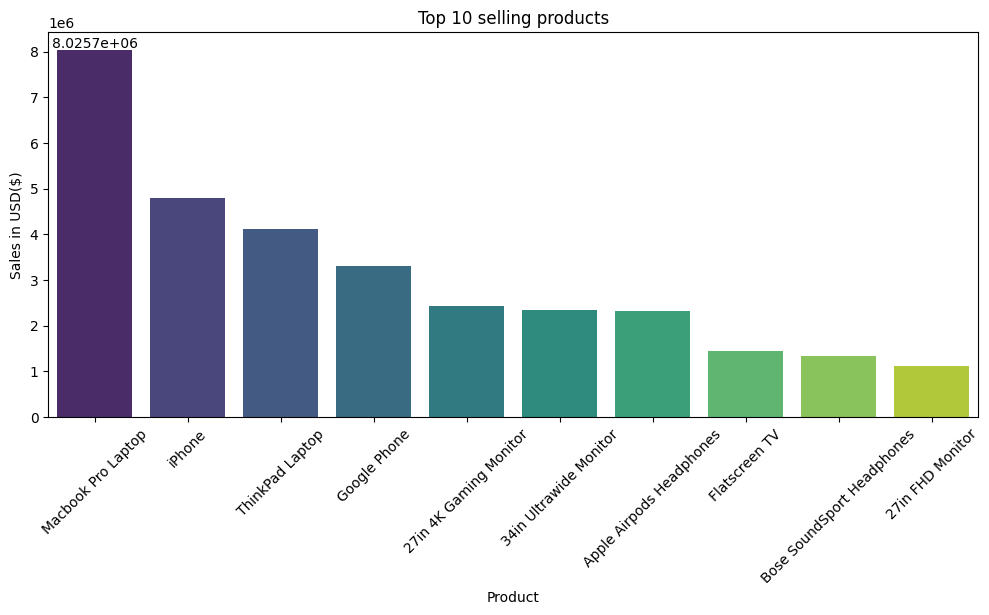

In [54]:
# plotting top 10 product based on the sales
plt.figure(figsize=(12,5))
ax = sns.barplot(data = top_10_products , x = 'Product' , y = 'Price Each' , palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('Top 10 selling products')
plt.ylabel('Sales in USD($)')
plt.xticks(rotation = 45)
plt.show()

### Checking sales revenue on the basis on months and city

In [55]:
sales_by_month = sales_df.groupby('Month')['Price Each'].sum().reset_index()
sales_by_month

,Month,Price Each
0,1,1810924.81
1,2,2186940.38
2,3,2789084.64
3,4,3366218.76
4,5,3133134.61
5,6,2560503.50
6,7,2631225.12
7,8,2226963.90
8,9,2081897.65
9,10,3713608.80


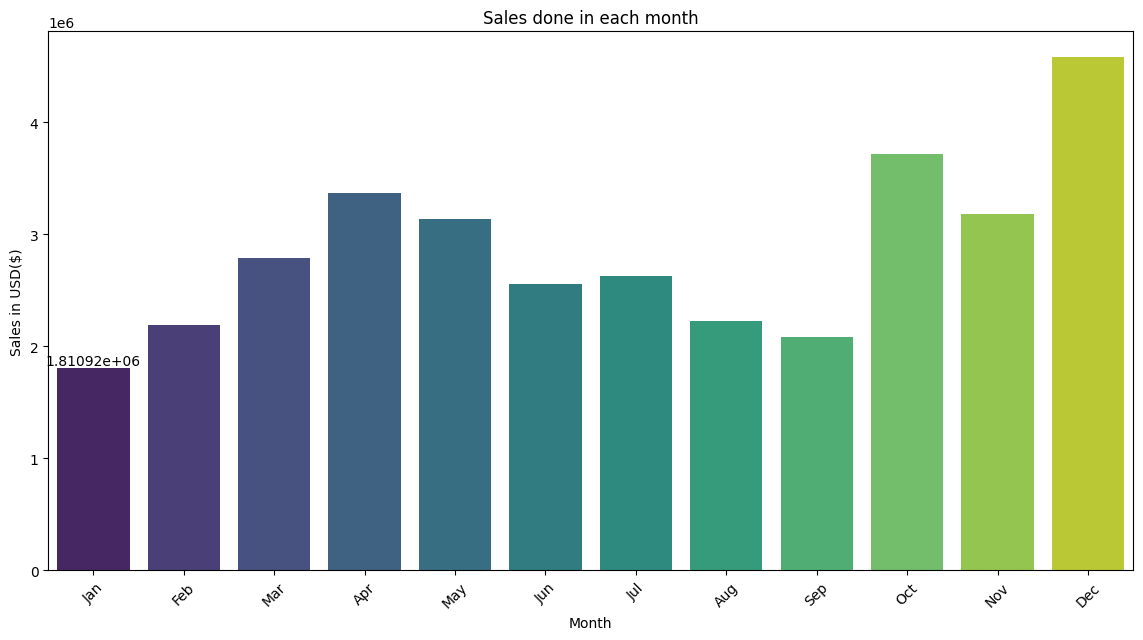

In [56]:
# revenue of sales on the basis of month
plt.figure(figsize=(14,7))
ax = sns.barplot(data = sales_by_month , x = 'Month' , y = 'Price Each' , palette = 'viridis')
ax.bar_label(ax.containers[0])
plt.title('Sales done in each month')
plt.ylabel('Sales in USD($)')
plt.xticks(ticks=np.arange(12) , labels=['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep' , 'Oct', 'Nov' , 'Dec'] , rotation = 45)
plt.show()

**As we can see the sales done in `Oct`,`Nov`, and `Dec` are higher as compared to other so keep your stock higher in these months**

In [57]:
sales_by_city = sales_df.groupby('City')['Price Each'].sum().reset_index()
sales_by_city

,City,Price Each
0,Atlanta,2778608.69
1,Austin,1808340.03
2,Boston,3634398.40
3,Dallas,2750026.38
4,Los Angeles,5417171.70
5,New York City,4632920.54
6,Portland,2306588.80
7,San Francisco,8204001.38
8,Seattle,2730586.55


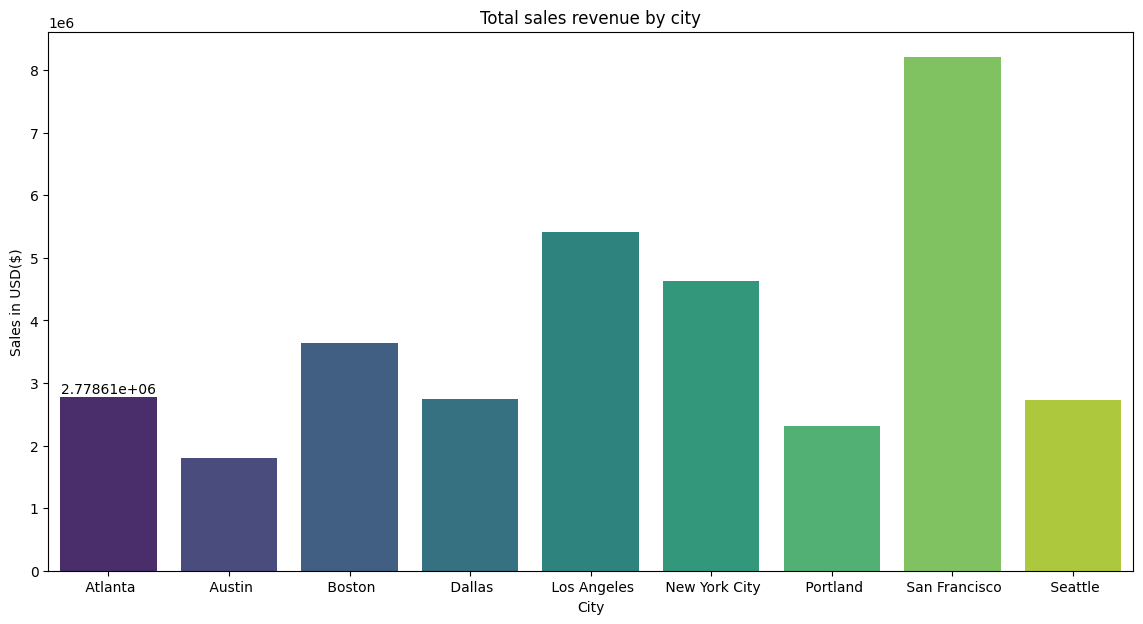

In [58]:
plt.figure(figsize=(14,7))
ax = sns.barplot(data = sales_by_city , x = 'City' , y = 'Price Each' , palette = 'viridis')
ax.bar_label(ax.containers[0])
plt.title('Total sales revenue by city')
plt.ylabel('Sales in USD($)')
plt.show()

**Sales done in `San Francisco` and `Los Angeles` is higher than other, so keep this in mind while selling the products**

### Analyzing hourly sales

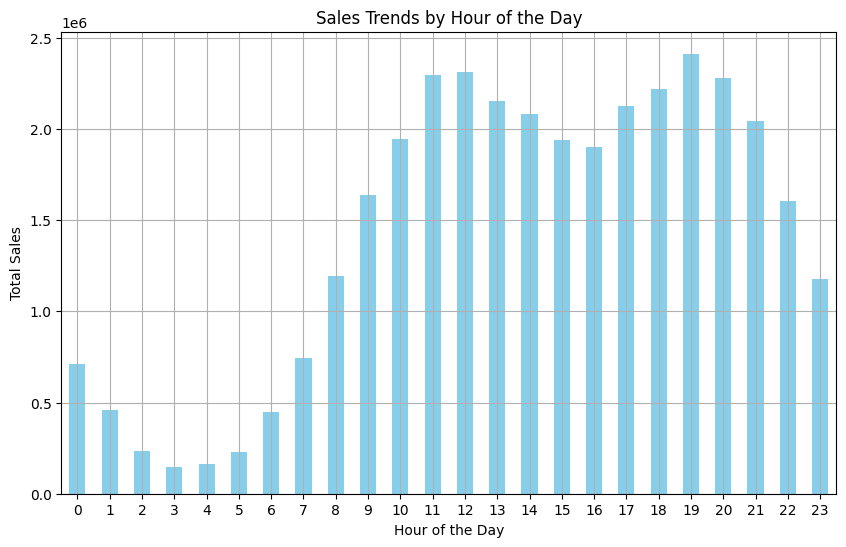

In [59]:
# Group by hour and calculate total sales
hourly_sales = sales_df.groupby('Hour').sum()['Sales']

# Plot the hourly sales trends
plt.figure(figsize=(10,6))
hourly_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Trends by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

### Identifying the peak hours for sales

In [60]:
# Identify peak hours
peak_hours = hourly_sales.sort_values(ascending=False).head(5)
print("Peak Hours with Highest Sales:")
print(peak_hours)

Peak Hours with Highest Sales:
Hour
19    2411971.14
12    2314359.85
11    2296619.84
20    2280784.36
18    2218374.01
Name: Sales, dtype: float64


### Products that are sold together

In [61]:
grouped_products = sales_df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
grouped_products

0             Macbook Pro Laptop
1             LG Washing Machine
2           USB-C Charging Cable
3               27in FHD Monitor
4           USB-C Charging Cable
                   ...          
185945    AAA Batteries (4-pack)
185946          27in FHD Monitor
185947      USB-C Charging Cable
185948      USB-C Charging Cable
185949    AAA Batteries (4-pack)
Name: Product, Length: 185686, dtype: object

In [62]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in grouped_products:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2127
('Google Phone', 'USB-C Charging Cable') 2106
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 943
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 446
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


### Price vs Quantity ordered

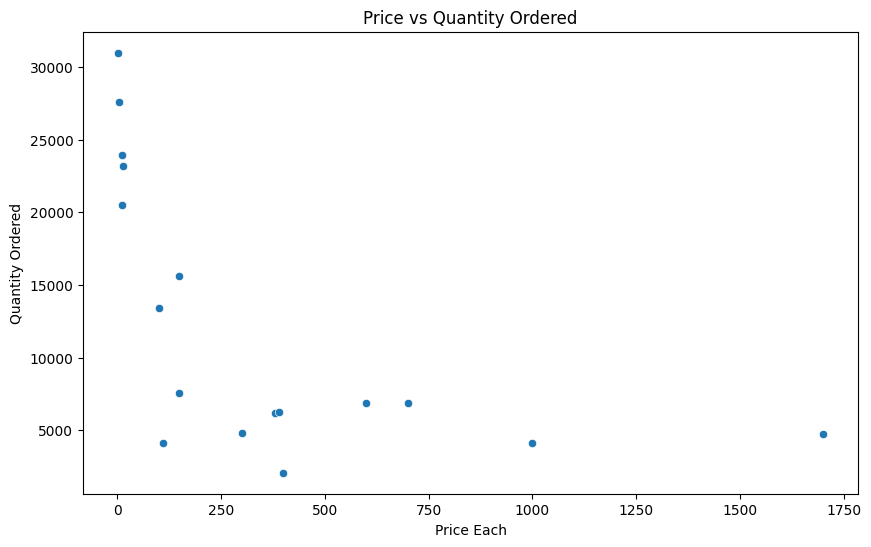

In [63]:
price_quantity = sales_df.groupby('Price Each').sum()['Quantity Ordered'].reset_index()

# Plot price vs quantity ordered
plt.figure(figsize=(10,6))

sns.scatterplot(data = price_quantity , x = 'Price Each', y = 'Quantity Ordered')
plt.title('Price vs Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.show()

**So we can see the product with less prices are ordered much than product with higher price**

### Probability of each product to be sold 

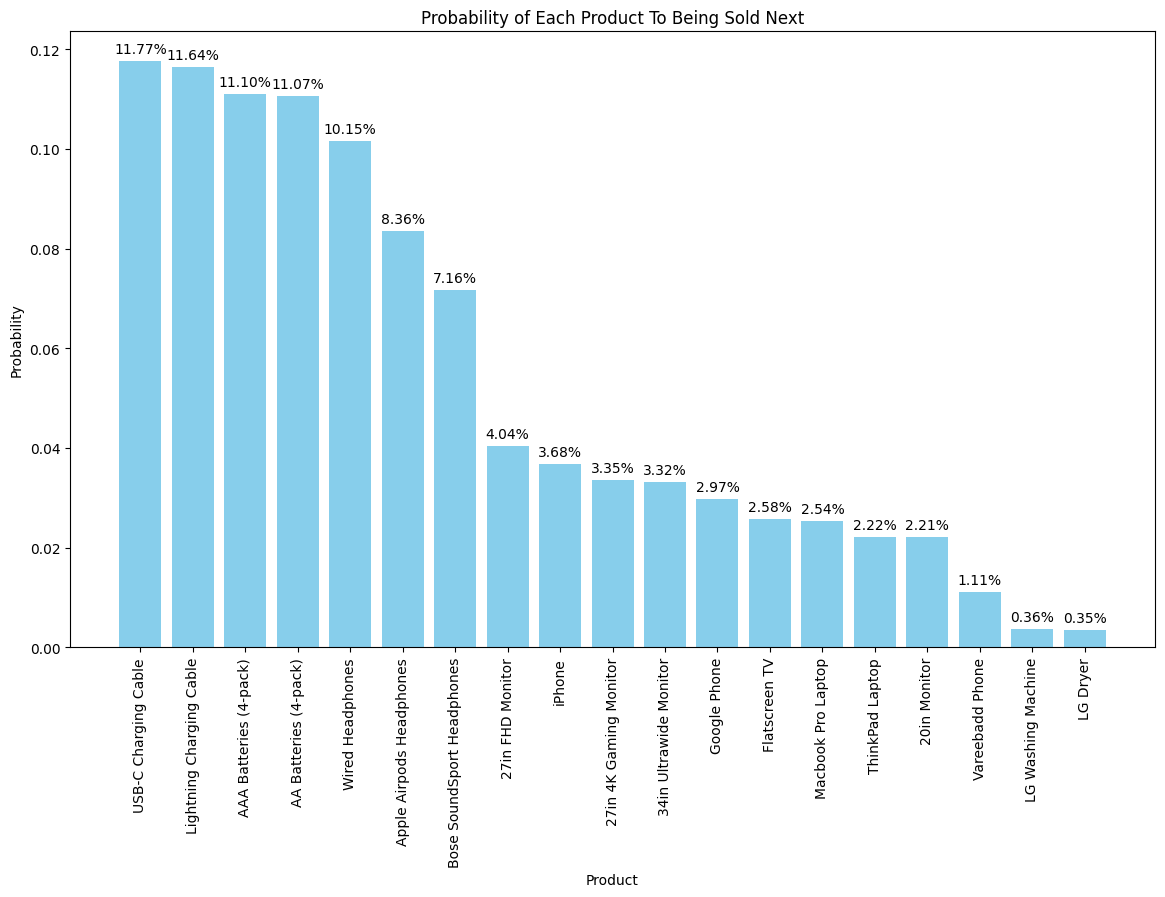

In [64]:
# Count the total number of orders for each product
product_counts = sales_df['Product'].value_counts()

# Calculate the probability of each product being sold
total_orders = len(sales_df)
product_probabilities = product_counts / total_orders

# Create a DataFrame for better visualization
product_prob_df = pd.DataFrame({'Product': product_probabilities.index, 'Probability': product_probabilities.values})

# Plot the probabilities
plt.figure(figsize=(14,8))
bars = plt.bar(product_prob_df['Product'], product_prob_df['Probability'], color='skyblue' , )
plt.title('Probability of Each Product To Being Sold Next')
plt.xlabel('Product')
plt.ylabel('Probability')
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.2%}', ha='center', va='bottom')

plt.show()

### Insight found from the data are:

- `Macbook Pro Laptop` , `iPhone` , and `ThinkPad Laptop` are the top three product based on the sales revenue
- `Oct` , `Nov` , and `Dec` are the best months for business
- Sales done in `Los Angeles` and `San Francisco` are higher as compared to other
- Peak Hours for sales are : `19`,`12`,`11`,`20`,and `18`
- Found the combination of the products that are sold together to help product makers
- Drawn the relationship of `Price` and `Quantity Ordered` and discovered that cheaper items are ordered most than the expensive ones
- Probability of each product that is being picked by customer next